   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


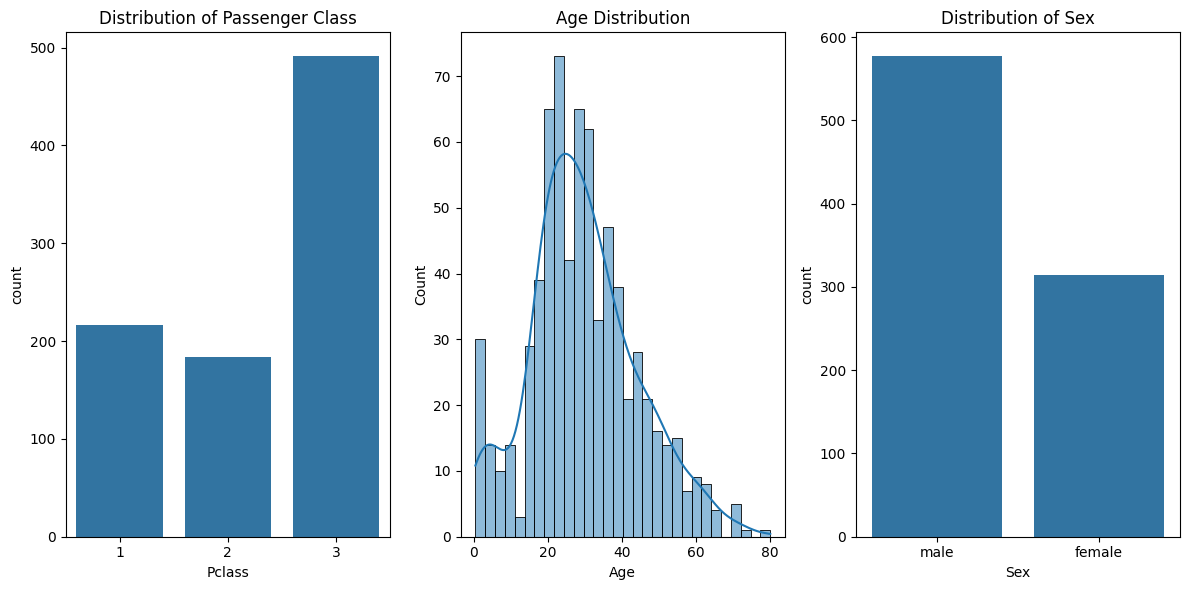

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

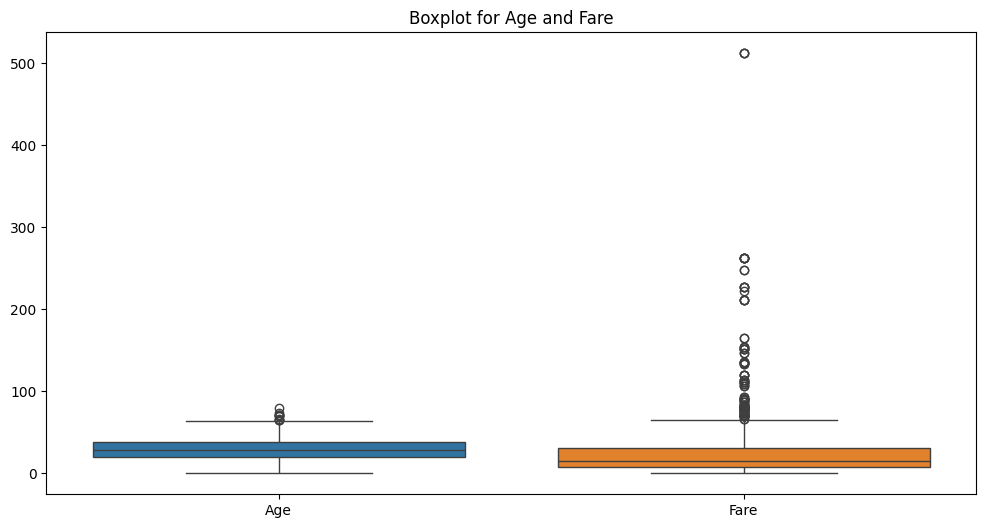

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500       2.0  
1          PC 17599  71.2833       0.0  
2  STON/O2. 3101282   7.9250       2.0  
3            113803  53.1000       2.0  
4            373450   8.0500       2.0  
   PassengerId  Survived  Pclass  \
0            1

<ipython-input-24-0cedbdc34bb3>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
<ipython-input-24-0cedbdc34bb3>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
titanic_df = pd.read_csv('titanic.csv')

# 1. Explore the Dataset
# Display the first few rows of the dataset
print(titanic_df.head())

# Visualize the distribution of key features
plt.figure(figsize=(12, 6))

# Distribution of Pclass
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Distribution of Passenger Class')

# Distribution of Age
plt.subplot(1, 3, 2)
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')

# Distribution of Sex
plt.subplot(1, 3, 3)
sns.countplot(x='Sex', data=titanic_df)
plt.title('Distribution of Sex')

plt.tight_layout()
plt.show()

# Check for missing values
print(titanic_df.isnull().sum())

# Check for outliers in Age and Fare
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_df[['Age', 'Fare']])
plt.title('Boxplot for Age and Fare')
plt.show()

# 2. Data Preprocessing
# Handle missing values: Fill missing Age with median and drop Cabin column
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Pclass'].fillna(titanic_df['Pclass'].median(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)
titanic_df.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables: Sex and Embarked
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check the updated DataFrame
print(titanic_df.head())

# Standardize numerical features: Age and Fare
scaler = StandardScaler()
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])

# Final DataFrame after preprocessing
print(titanic_df.head())

# New Section

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Data Preprocessing (as previously discussed)
titanic_df.loc[:, 'Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
if 'Cabin' in titanic_df.columns:
    titanic_df.drop(columns=['Cabin'], inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Define features and target variable
X = titanic_df[[  'Age', 'Fare']]
y = titanic_df['Survived']

# Standardize numerical features
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())
# 1. Model Training

# k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Model Evaluation

# Predictions for k-NN
y_pred_knn = knn_model.predict(X_test)

# Predictions for Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of each model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

# k-NN Evaluation
knn_metrics = evaluate_model(y_test, y_pred_knn)

# Decision Tree Evaluation
dt_metrics = evaluate_model(y_test, y_pred_dt)

# Display results
print("k-NN Metrics:")
print(f"Accuracy: {knn_metrics[0]:.4f}, Precision: {knn_metrics[1]:.4f}, Recall: {knn_metrics[2]:.4f}, F1 Score: {knn_metrics[3]:.4f}")

print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_metrics[0]:.4f}, Precision: {dt_metrics[1]:.4f}, Recall: {dt_metrics[2]:.4f}, F1 Score: {dt_metrics[3]:.4f}")

# Optional: Display classification reports for more detailed analysis
print("\nClassification Report for k-NN:")
print(classification_report(y_test, y_pred_knn))

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Missing values in X_train: 0
Missing values in X_test: 0
k-NN Metrics:
Accuracy: 0.6828, Precision: 0.6625, Recall: 0.4775, F1 Score: 0.5550

Decision Tree Metrics:
Accuracy: 0.6381, Precision: 0.5854, Recall: 0.4324, F1 Score: 0.4974

Classification Report for k-NN:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       157
           1       0.66      0.48      0.55       111

    accuracy                           0.68       268
   macro avg       0.68      0.65      0.65       268
weighted avg       0.68      0.68      0.67       268


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.66      0.78      0.72       157
           1       0.59      0.43      0.50       111

    accuracy                           0.64       268
   macro avg       0.62      0.61      0.61       268
weighted avg       0.63      0.64      0.63       268



<ipython-input-26-7f7e7ea971df>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


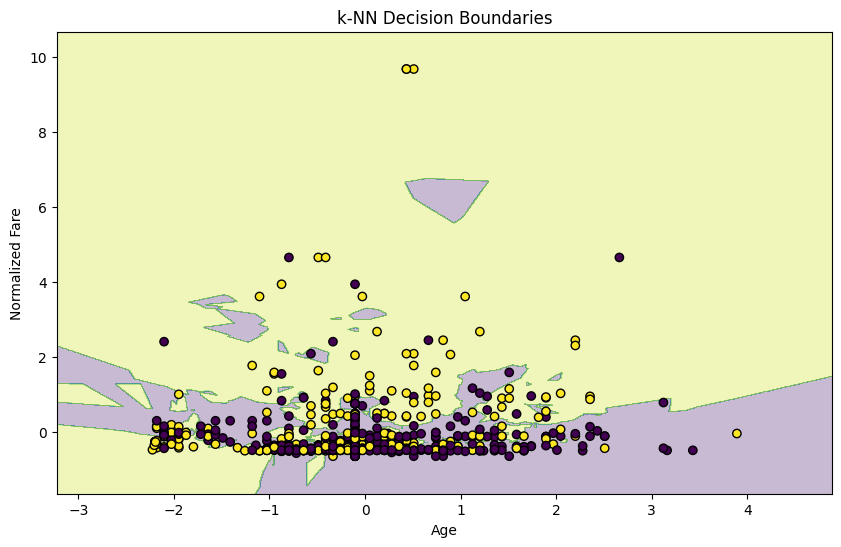

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


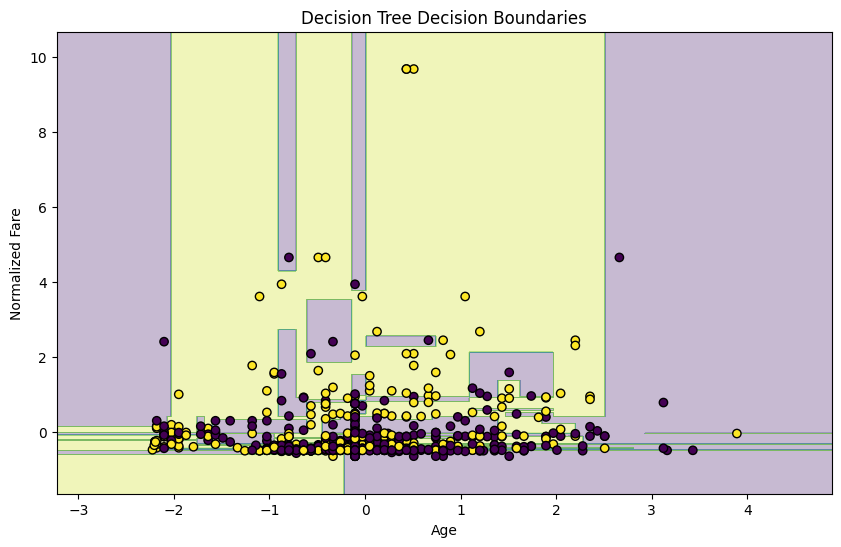

In [ ]:
def plot_decision_boundaries(X, y, model, title):
    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Age')
    plt.ylabel('Normalized Fare')
    plt.title(title)
    plt.show()

# Plot decision boundaries for k-NN and Decision Tree models
plot_decision_boundaries(X_train, y_train, knn_model, "k-NN Decision Boundaries")
plot_decision_boundaries(X_train, y_train, dt_model, "Decision Tree Decision Boundaries")

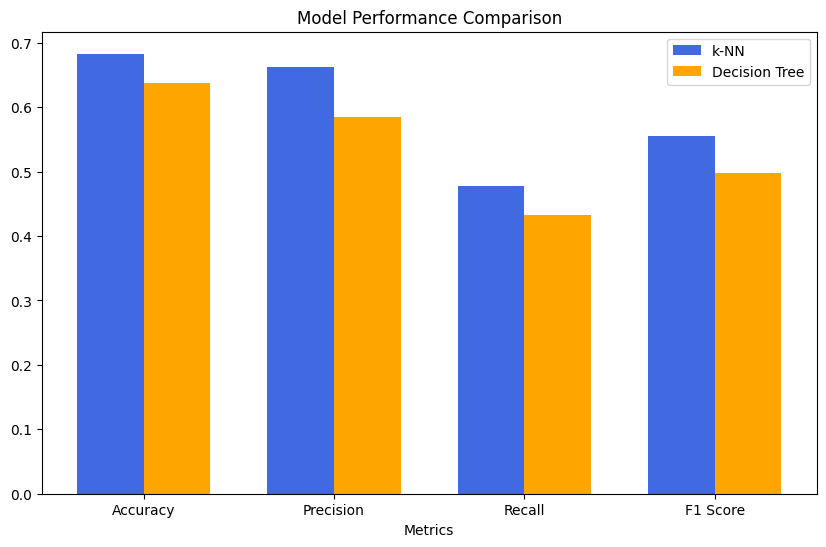

In [ ]:
y_pred_knn = knn_model.predict(X_test)
knn_metrics = evaluate_model(y_test, y_pred_knn)

# Decision Tree Evaluation
y_pred_dt = dt_model.predict(X_test)
dt_metrics = evaluate_model(y_test, y_pred_dt)

# Bar chart for performance metrics comparison
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
knn_values = list(knn_metrics)
dt_values = list(dt_metrics)

x_labels = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x_labels - width/2, knn_values, width=width,
                label='k-NN', color='royalblue')
bars2 = ax.bar(x_labels + width/2, dt_values, width=width,
                label='Decision Tree', color='orange')

ax.set_xlabel('Metrics')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x_labels)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.show()